In [1]:
import pandas as pd
import numpy as np
import pulp
import matplotlib.pyplot as plt
from scipy.stats import beta
import collections

In [2]:
proj_list= pd.read_csv('Scenario5_InputData.csv', index_col=['Index'])
proj_list = proj_list.drop(['Year_1','Year_2','Year_3','Year4_Onwards'], axis=1)
proj_list

,Programme,CAPEX,Type,Location,Region,BenefitPerYr,CAPEX_Min,CAPEX_Mode,CAPEX_Max,Benefit_Min,Benefit_Mode,Benefit_Max
Index,,,,,,,,,,,,
1,CivilStructural,5,AssetIntegrity,Facility H,Zone3,2,0.95,1.0,1.5,0.60,1.0,1.1
2,Electrical,15,AssetIntegrity,Facility M,Zone5,3,0.90,1.0,1.2,0.80,1.0,1.1
3,Piping,10,AssetIntegrity,Facility E,Zone5,5,0.90,1.0,1.2,0.80,1.0,1.1
4,Instrumentation,5,AssetIntegrity,Facility E,Zone5,2,0.90,1.0,1.2,0.80,1.0,1.1
5,CivilStructural,10,Growth,Facility M,Zone5,4,0.90,1.0,1.2,0.80,1.0,1.1
6,Expansion,15,Growth,Facility C,Zone3,8,0.80,1.0,1.7,0.80,1.0,1.1
7,Debottlenecking,10,Growth,Facility M,Zone5,2,0.90,1.0,1.2,0.85,1.0,1.1
8,Revamp,2,Growth,Facility G,Zone1,1,0.90,1.0,1.2,0.85,1.0,1.1
9,Revamp,3,Growth,Facility F,Zone1,1,0.90,1.0,1.2,0.95,1.0,1.1


In [3]:
proj_list.dtypes

Programme        object
CAPEX             int64
Type             object
Location         object
Region           object
BenefitPerYr      int64
CAPEX_Min       float64
CAPEX_Mode      float64
CAPEX_Max       float64
Benefit_Min     float64
Benefit_Mode    float64
Benefit_Max     float64
dtype: object

In [4]:
discountrate=0.05
#Annual CAPEX Constraints Yr1,2,3,4+ 
capexconstraints=[20,30,25,0] #Note final year 4 onwards is zero as any that do not fit in 1-3 will spill to future capex

In [5]:
proj_list['Capex_BetaDist_Mean'] = (proj_list['CAPEX_Min']+4*proj_list['CAPEX_Mode']+proj_list['CAPEX_Max'])/6
proj_list['Capex_BetaDist_Alpha'] = ((proj_list['Capex_BetaDist_Mean']-proj_list['CAPEX_Min'])*(2*proj_list['CAPEX_Mode']-proj_list['CAPEX_Min']-proj_list['CAPEX_Max']))/((proj_list['CAPEX_Mode']-proj_list['Capex_BetaDist_Mean'])*(proj_list['CAPEX_Max']-proj_list['CAPEX_Min']))
proj_list['Capex_BetaDist_Beta'] = proj_list['Capex_BetaDist_Alpha']*(proj_list['CAPEX_Max']-proj_list['Capex_BetaDist_Mean'])/(proj_list['Capex_BetaDist_Mean']-proj_list['CAPEX_Min'])


In [6]:
proj_list['Benefit_BetaDist_Mean'] = (proj_list['Benefit_Min']+4*proj_list['Benefit_Mode']+proj_list['Benefit_Max'])/6
proj_list['Benefit_BetaDist_Alpha'] = ((proj_list['Benefit_BetaDist_Mean']-proj_list['Benefit_Min'])*(2*proj_list['Benefit_Mode']-proj_list['Benefit_Min']-proj_list['Benefit_Max']))/((proj_list['Benefit_Mode']-proj_list['Benefit_BetaDist_Mean'])*(proj_list['Benefit_Max']-proj_list['Benefit_Min']))
proj_list['Benefit_BetaDist_Beta'] = proj_list['Benefit_BetaDist_Alpha']*(proj_list['Benefit_Max']-proj_list['Benefit_BetaDist_Mean'])/(proj_list['Benefit_BetaDist_Mean']-proj_list['Benefit_Min'])


In [7]:
proj_list

,Programme,CAPEX,Type,Location,Region,BenefitPerYr,CAPEX_Min,CAPEX_Mode,CAPEX_Max,Benefit_Min,Benefit_Mode,Benefit_Max,Capex_BetaDist_Mean,Capex_BetaDist_Alpha,Capex_BetaDist_Beta,Benefit_BetaDist_Mean,Benefit_BetaDist_Alpha,Benefit_BetaDist_Beta
Index,,,,,,,,,,,,,,,,,,
1,CivilStructural,5,AssetIntegrity,Facility H,Zone3,2,0.95,1.0,1.5,0.60,1.0,1.1,1.075000,1.363636,4.636364,0.950000,4.200000,1.800000
2,Electrical,15,AssetIntegrity,Facility M,Zone5,3,0.90,1.0,1.2,0.80,1.0,1.1,1.016667,2.333333,3.666667,0.983333,3.666667,2.333333
3,Piping,10,AssetIntegrity,Facility E,Zone5,5,0.90,1.0,1.2,0.80,1.0,1.1,1.016667,2.333333,3.666667,0.983333,3.666667,2.333333
4,Instrumentation,5,AssetIntegrity,Facility E,Zone5,2,0.90,1.0,1.2,0.80,1.0,1.1,1.016667,2.333333,3.666667,0.983333,3.666667,2.333333
5,CivilStructural,10,Growth,Facility M,Zone5,4,0.90,1.0,1.2,0.80,1.0,1.1,1.016667,2.333333,3.666667,0.983333,3.666667,2.333333
6,Expansion,15,Growth,Facility C,Zone3,8,0.80,1.0,1.7,0.80,1.0,1.1,1.083333,1.888889,4.111111,0.983333,3.666667,2.333333
7,Debottlenecking,10,Growth,Facility M,Zone5,2,0.90,1.0,1.2,0.85,1.0,1.1,1.016667,2.333333,3.666667,0.991667,3.400000,2.600000
8,Revamp,2,Growth,Facility G,Zone1,1,0.90,1.0,1.2,0.85,1.0,1.1,1.016667,2.333333,3.666667,0.991667,3.400000,2.600000
9,Revamp,3,Growth,Facility F,Zone1,1,0.90,1.0,1.2,0.95,1.0,1.1,1.016667,2.333333,3.666667,1.008333,2.333333,3.666667


In [8]:
config=[]
sumNPV=[]


In [9]:
%%time

NoOfIterations = 1000

for i in range(1,NoOfIterations):
    proj_list['RiskedCAPEX']= beta.ppf(np.random.uniform(0,1,1), proj_list['Capex_BetaDist_Alpha'], proj_list['Capex_BetaDist_Beta'], loc=proj_list['CAPEX_Min'], scale=proj_list['CAPEX_Max']-proj_list['CAPEX_Min'])[0]*proj_list['CAPEX']
    proj_list['RiskedBenefitPerYr']= beta.ppf(np.random.uniform(0,1,1), proj_list['Benefit_BetaDist_Alpha'], proj_list['Benefit_BetaDist_Beta'], loc=proj_list['Benefit_Min'], scale=proj_list['Benefit_Max']-proj_list['Benefit_Min'])[0]*proj_list['BenefitPerYr']
    # 2.1 Create A Model

    phasing = pulp.LpProblem("Maximise", pulp.LpMaximize)

    YrOne = pulp.LpVariable.dicts("YrOne", proj_list.index, cat='Binary')
    YrTwo = pulp.LpVariable.dicts("YrTwo", proj_list.index, cat='Binary')
    YrThree = pulp.LpVariable.dicts("YrThree", proj_list.index, cat='Binary')
    YrFour = pulp.LpVariable.dicts("YrFour", proj_list.index, cat='Binary')

    # 2.2 Set The Objective Function                                                                                                         
    phasing += pulp.lpSum(
        [YrOne[idx]*proj_list.loc[idx]["RiskedBenefitPerYr"]*(1/(1+discountrate)**1 + 1/(1+discountrate)**2 + 1/(1+discountrate)**3) +
        YrTwo[idx]*proj_list.loc[idx]["RiskedBenefitPerYr"]*(1/(1+discountrate)**2 + 1/(1+discountrate)**3) +
        YrThree[idx]*proj_list.loc[idx]["RiskedBenefitPerYr"]*(1/(1+discountrate)**3) for idx in proj_list.index])


    # 2.3 Set The Constraints 
    for idx in proj_list.index:
        phasing += YrOne[idx] + YrTwo[idx] + YrThree[idx] + YrFour[idx]==1

    phasing += sum([YrOne[idx] * proj_list.loc[idx]["RiskedCAPEX"] for idx in proj_list.index]) <= capexconstraints[0]
    phasing += sum([YrTwo[idx] * proj_list.loc[idx]["RiskedCAPEX"] for idx in proj_list.index]) <= capexconstraints[1]
    phasing += sum([YrThree[idx] * proj_list.loc[idx]["RiskedCAPEX"] for idx in proj_list.index]) <= capexconstraints[2]

    # 2.4 Run The Solver(s)

    phasing.solve() #equivalent to phasing.solve(pulp.PULP_CBC_CMD()) as CBC is PulP's default solver
    
    
    pulp.LpStatus[phasing.status]

    # 2.5 Print our objective function value and Output Solution
    pulp.value(phasing.objective)

    for idx in proj_list.index:
        print(idx, proj_list.loc[idx]["Programme"], YrOne[idx].value(), YrTwo[idx].value(), YrThree[idx].value(), YrFour[idx].value())

    # 2.6 Convert output into user friendly output for viewing or downloading 
    pulpsolution=pd.DataFrame(columns = ["Yr1", "Yr2", "Yr3", "Yr4_Onwards"])
    for idx in proj_list.index:
        to_append = [YrOne[idx].value(), YrTwo[idx].value(), YrThree[idx].value(), YrFour[idx].value()]
        perprojectyear = pd.Series(to_append, index = pulpsolution.columns)
        pulpsolution = pulpsolution.append(perprojectyear, ignore_index=True)

    pulpsolution.index += 1 

    pulpoutput = pd.concat([proj_list, pulpsolution], axis=1)
    pulpoutput['NPV_Benefit_3YrHorizon'] = (pulpoutput["Yr1"]*pulpoutput["BenefitPerYr"]*(1/(1+discountrate)**1 + 1/(1+discountrate)**2 + 1/(1+discountrate)**3) + pulpoutput["Yr2"]*pulpoutput["BenefitPerYr"]*(1/(1+discountrate)**2 + 1/(1+discountrate)**3) + pulpoutput["Yr3"]*pulpoutput["BenefitPerYr"]*(1/(1+discountrate)**3))
    pulpoutput['NPV_Benefit_3YrHorizon']=pulpoutput['NPV_Benefit_3YrHorizon'].astype(float).round(2)

    YearSelectionConditions = [
        (pulpoutput['Yr1'] == 1),
        (pulpoutput['Yr2'] ==1),
        (pulpoutput['Yr3'] ==1 ),
        (pulpoutput['Yr4_Onwards'] ==1)
        ]

    YearSelectionValues = ['1', '2', '3', '4']

    # create a new column and use np.select to assign values to it using our lists as arguments
    pulpoutput['SelectedYr'] = np.select(YearSelectionConditions, YearSelectionValues)
    
    iter_config=[]

    for i in range(1,len(pulpoutput.index)+1):
        iter_config.append(pulpoutput.loc[i]["SelectedYr"])

    iter_config=''.join(iter_config)

    config.append(iter_config)

    sumNPV.append(round(pulp.value(phasing.objective),3))

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 0.0 1.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 0.0 1.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 0.0 1.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 1.0 0.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 0.0 1.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 0.0 1.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 1.0 0.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 1.0 0.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 0.0 1.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 0.0 1.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 0.0 1.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 0.0 1.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 0.0 1.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 1.0 0.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 0.0 1.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 1.0 0.0 0.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 0.0 1.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 0.0 1.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 0.0 1.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 0.0 1.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 1.0 0.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 0.0 1.0 0.0
6 Expansion 0.0 1.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 0.0 1.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 0.0 1.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 0.0 1.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 0.0 1.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 1.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 0.0 1.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 0.0 1.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 1.0 0.0 0.0 0.0
9 Revamp 0.0 0.0 0.0 1.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

1 CivilStructural 0.0 1.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 1.0 0.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 1.0 0.0 0.0 0.0
10 Expansion 0.0 0.0 1.0 0.0
1 CivilStructural 1.0 0.0 0.0 0.0
2 Electrical 0.0 0.0 1.0 0.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0 1.0 0.0 0.0
5 CivilStructural 0.0 1.0 0.0 0.0
6 Expansion 1.0 0.0 0.0 0.0
7 Debottlenecking 0.0 0.0 1.0 0.0
8 Revamp 0.0 1.0 0.0 0.0
9 Revamp 0.0 1.0 0.0 0.0
10 Expansion 0.0 0.0 0.0 1.0
1 CivilStructural 0.0 0.0 1.0 0.0
2 Electrical 0.0 0.0 0.0 1.0
3 Piping 0.0 1.0 0.0 0.0
4 Instrumentation 0.0

In [10]:
config

['3422213123',
 '2423213143',
 '2321214223',
 '2422314223',
 '3422213123',
 '1322213224',
 '2423213213',
 '2321213224',
 '2423213143',
 '2423214133',
 '1322214223',
 '2422313212',
 '1322214223',
 '2423213334',
 '2322214113',
 '1322213224',
 '2423213143',
 '3423214233',
 '2322213114',
 '2322214113',
 '2423213143',
 '2423214133',
 '2422314233',
 '2423214133',
 '3423214323',
 '3422213213',
 '1322214223',
 '1322214223',
 '2322214113',
 '4422213133',
 '2424213133',
 '3422314232',
 '2322213114',
 '2422314323',
 '2423214133',
 '3422213143',
 '2423214133',
 '3423214233',
 '3422213213',
 '2422314323',
 '3423214233',
 '3423214323',
 '2322213114',
 '1322213224',
 '3422213213',
 '2322213114',
 '1322213224',
 '3422213213',
 '1322213224',
 '2423213213',
 '2423213213',
 '2423213213',
 '2423213143',
 '2423214133',
 '3422213123',
 '2423213143',
 '3422213123',
 '2322213114',
 '2321213224',
 '2423213213',
 '2422314233',
 '2423213213',
 '2423213143',
 '3422213143',
 '2423213143',
 '2424213133',
 '23222131

In [11]:
sumNPV

[48.26,
 48.903,
 48.58,
 48.125,
 51.118,
 55.224,
 54.771,
 47.315,
 45.438,
 40.661,
 49.154,
 48.187,
 54.172,
 47.333,
 49.002,
 54.057,
 48.697,
 43.448,
 56.547,
 51.761,
 47.64,
 46.979,
 48.572,
 49.089,
 47.603,
 48.619,
 55.183,
 56.598,
 45.855,
 40.273,
 45.626,
 49.064,
 55.658,
 48.311,
 42.759,
 52.956,
 49.71,
 44.656,
 47.928,
 45.402,
 47.069,
 45.99,
 52.646,
 49.022,
 49.372,
 54.154,
 51.276,
 52.221,
 50.304,
 44.853,
 44.585,
 45.099,
 43.029,
 42.167,
 52.194,
 50.186,
 43.161,
 56.441,
 47.363,
 39.443,
 48.72,
 50.816,
 51.99,
 49.819,
 48.592,
 52.108,
 58.587,
 35.158,
 46.936,
 55.337,
 40.115,
 52.973,
 50.334,
 53.474,
 44.451,
 52.105,
 45.1,
 45.827,
 57.871,
 50.7,
 45.032,
 49.565,
 51.064,
 47.527,
 55.57,
 47.623,
 41.375,
 50.1,
 46.041,
 53.145,
 43.699,
 48.561,
 43.243,
 48.846,
 42.644,
 52.534,
 42.583,
 42.209,
 57.814,
 57.483,
 43.907,
 46.052,
 53.853,
 46.584,
 57.206,
 37.984,
 52.632,
 50.28,
 53.694,
 48.847,
 53.193,
 35.245,
 34.074

(array([  2.,   9.,   8.,   9.,  21.,  34.,  40.,  58.,  74.,  90.,  91.,
        113.,  98.,  87.,  79.,  78.,  54.,  24.,  18.,  12.]),
 array([32.218, 33.599, 34.98 , 36.361, 37.742, 39.123, 40.504, 41.885,
        43.266, 44.647, 46.028, 47.409, 48.79 , 50.171, 51.552, 52.933,
        54.314, 55.695, 57.076, 58.457, 59.838]),
 <BarContainer object of 20 artists>)

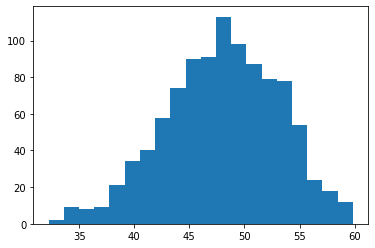

In [12]:
plt.hist(sumNPV, 20)

In [13]:
counter=collections.Counter(config)
counter

Counter({'3422213123': 105,
         '2423213143': 58,
         '2321214223': 19,
         '2422314223': 4,
         '1322213224': 51,
         '2423213213': 166,
         '2321213224': 27,
         '2423214133': 41,
         '1322214223': 64,
         '2422313212': 20,
         '2423213334': 7,
         '2322214113': 26,
         '3423214233': 41,
         '2322213114': 36,
         '2422314233': 15,
         '3423214323': 24,
         '3422213213': 102,
         '4422213133': 2,
         '2424213133': 39,
         '3422314232': 6,
         '2422314323': 12,
         '3422213143': 13,
         '2423214333': 9,
         '3422214133': 12,
         '2423314232': 9,
         '2423213123': 45,
         '3423213212': 14,
         '3423214243': 7,
         '2413324214': 2,
         '2422314243': 1,
         '3412324134': 4,
         '3423214223': 6,
         '4412324213': 2,
         '3422213134': 1,
         '3423213224': 3,
         '3422214333': 3,
         '3422213334': 1,
         '2414

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

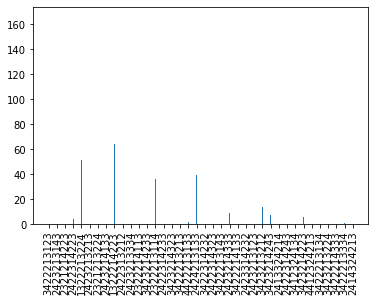

In [14]:
plt.hist(config, NoOfIterations)
plt.xticks(rotation=90)